# 크로마키 배경 제거

In [5]:
import cv2
import numpy as np
import subprocess as sp
from matplotlib import pyplot as plt

In [6]:
def imshow(tit, image):
    plt.title(tit)
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap = 'gray')
    plt.show()

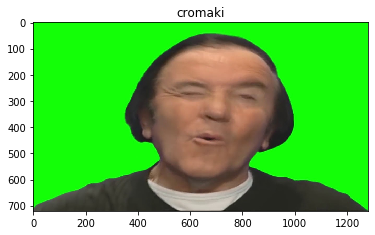

In [7]:
img = cv2.imread('cromaki.jpg')
imshow('cromaki', img)

In [8]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print(hsv.shape)
# print(hsv)
h = hsv[:,:,0]
print(h)
s = hsv[:,:,1]
print(s)
print(h.shape)

(720, 1280, 3)
[[ 58  58  58 ...  58  58  58]
 [ 58  58  58 ...  58  58  58]
 [ 58  58  58 ...  58  58  58]
 ...
 [  0  75  75 ...  61  61  61]
 [140 120 120 ...  64  65  64]
 [140 140 126 ...  69  67  67]]
[[248 248 248 ... 248 248 248]
 [248 248 248 ... 248 248 248]
 [248 248 248 ... 248 248 248]
 ...
 [  0   6   6 ... 168 169 166]
 [  9   6   6 ... 147 149 158]
 [  9   9  15 ... 138 143 151]]
(720, 1280)


In [48]:
def chromakey(img, background) :    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    patch = hsv[0:20, 0:20, :]
    hsv = cv2.resize(hsv, dsize=(320,240))
    background = cv2.resize(background, dsize=(320,240))
    minH = np.min(patch[:,:,0])*0.9
    maxH = np.max(patch[:,:,0])*1.1
    minS = np.min(patch[:,:,1])*0.9
    maxS = np.max(patch[:,:,1])*1.1
    h = hsv[:,:,0]
    s = hsv[:,:,1]
    dest = hsv.copy()
    for r in range(hsv.shape[0]) :
        for c in range(hsv.shape[1]) :
            if h[r,c] >= minH and h[r,c] <= maxH and   s[r,c] >= minS  and s[r,c] <= maxS : 
                dest[r,c, :] = background[r,c,:]
            else :
                dest[r,c, :] =  hsv[r,c,:]
    return dest

In [51]:
background = cv2.imread('sun.jpg')

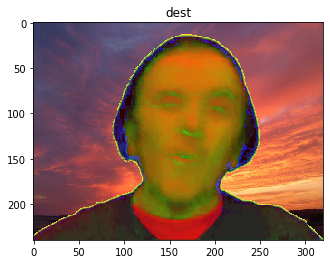

In [52]:
dest = chromakey(img, background)
imshow('dest', dest)

In [10]:
print(img.shape)
print(img.shape[0])
print(img.shape[1])

(720, 1280, 3)
720
1280


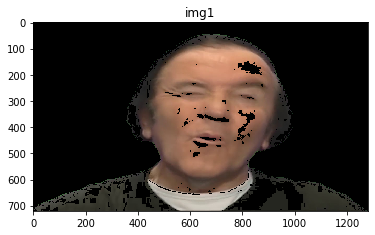

In [29]:
img1 = img.copy()
for r in range(img.shape[0]):
    for c in range(img.shape[1]):
        if h[r,c] >= 70 & h[r,c] <= 88 & s[r,c] >= 200 & s[r,c] <= 240:
            img1[r,c, :] = img[r, c, :]
        else:
            img1[r,c,:] = [0,0,0]
imshow("img1", img1)

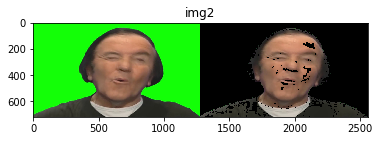

In [26]:
img2 = np.hstack((img, img1))
imshow('img2', img2)

# 동영상 불러오기

In [36]:
# 크로마키 제거 함수
def chromakey(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    patch = hsv[0:20, 0:20, :]
    minH = np.min(patch[:,:,0]) * 0.9
    maxH = np.max(patch[:,:,0]) * 1.1
    minS = np.min(patch[:,:,1]) * 0.9
    maxS = np.max(patch[:,:,1]) * 1.1
    h = hsv[:,:,0]
    s = hsv[:,:,1]
    dest = img.copy()
    for r in range(img.shape[0]):
         for c in range(img.shape[1]) :
            if h[r,c] >= minH and h[r,c] <= maxH and   s[r,c] >= minS  and s[r,c] <= maxS : 
                dest[r,c, :] = [0,0,0]         
            else :
                dest[r,c, :] =  img[r,c,:]
    return dest            

In [38]:
cap = cv2.VideoCapture('capdiffer.mp4')
for i in range(25*6):
    ret, frame = cap.read()
    frame = cv2.resize(frame, dsize=(320,240)) # 사이즈 줄이기
    
    dest = chromakey(frame)
    
    cv2.imshow('frame', dest)
    if cv2.waitKey(30) == 27:
        break
        
cv2.destroyAllWindows()

# Flask 사용하여 서버(웹) 만들기

In [19]:
%%writefile server.py
# 서버 만들기
# 장고랑 비슷한 느낌
# localhost:8000 가면 hello~ 보임

from flask import Flask, request

app = Flask(__name__)

@app.route('/')
def index():
    return "안녕하세요^^"

@app.route('/upload')
def upload():
    return "upload~~~!!"

if __name__ == '__main__':
    app.run(host='0.0.0.0', debug=True, port=8000)

Overwriting server.py


In [20]:
sever = sp.Popen('python server.py',shell = True)